In [1]:
# Cell 1: Install dependencies
!pip install tensorflow tensorflow-hub tensorflow-text -U --quiet
!pip install imbalanced-learn --quiet
!pip install openpyxl --quiet
!pip install transformers sentencepiece --quiet
!pip install matplotlib --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.0/645.0 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 105.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 136.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 99.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 171.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 10.6 MB/s eta 0:00:00


In [2]:
# Cell 2: Load dataset
import pandas as pd

df = pd.read_excel('/content/Bhaav-Dataset.xlsx')
df.columns = ['Sentence', 'Annotation']
print(df.head())


                                            Sentence  Annotation
0           रमजान के पूरे तीस रोजों के बाद ईद आयी है           1
1               कितना मनोहर, कितना सुहावना प्रभाव है           1
2  वृक्षों पर अजीब हरियाली है, खेतों में कुछ अजीब...           1
3  आज का सूर्य देखो, कितना प्यारा, कितना शीतल है,...           1
4                             गाँव में कितनी हलचल है           1


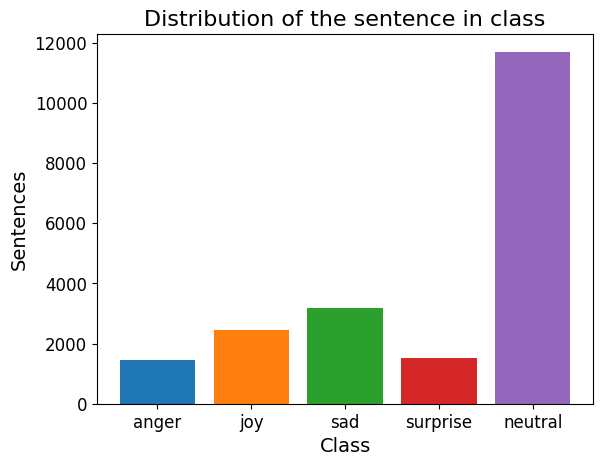

Original class counts: {0: 1464, 1: 2463, 2: 3168, 3: 1512, 4: 11697}


In [4]:
import matplotlib.pyplot as plt

# Map class index to emotion names (update with your actual mapping)
emotion_map = {
    0: 'anger',
    1: 'joy',
    2: 'sad',
    3: 'surprise',
    4: 'neutral'
}
# Assign colors for each emotion (optional, choose any palette you like)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Get class counts
class_counts = df['Annotation'].value_counts().sort_index()

plt.bar(
    [emotion_map[i] for i in class_counts.index],
    class_counts.values,
    color=colors,
    width=0.8
)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Sentences', fontsize=14)
plt.title('Distribution of the sentence in class', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

print('Original class counts:', class_counts.to_dict())


In [ ]:
# Download and load Hindi stopword list
!wget https://raw.githubusercontent.com/stopwords-iso/stopwords-hi/master/stopwords-hi.txt -O stopwords-hi.txt
with open("stopwords-hi.txt", encoding="utf-8") as f:
    hindi_stopwords = set([line.strip() for line in f if line.strip()])

# Use indic-nlp for tokenization
from indicnlp.tokenize import indic_tokenize
import re

# Simple Hindi stemmer function (very basic, strips common suffixes)
def hindi_stem(word):
    # Remove common Hindi verb/noun suffixes (add/remove rules as needed)
    suffixes = ['ा', 'ी', 'ं', 'े', 'ों', 'ें', 'ि', 'ो', 'े', 'ता', 'ती', 'ते', 'ना', 'ने', 'कर', 'ाना']
    for suff in suffixes:
        if word.endswith(suff):
            return word[:-len(suff)]
    return word

def simple_preprocess(sentence):
    tokens = indic_tokenize.trivial_tokenize(str(sentence), lang='hi')
    tokens = [t for t in tokens if t not in hindi_stopwords]
    stems = [hindi_stem(t) for t in tokens]
    return ' '.join(stems)

df['Sentence_Clean'] = df['Sentence'].apply(simple_preprocess)
print(df[['Sentence', 'Sentence_Clean']].sample(5))


--2025-11-01 17:45:43--  https://raw.githubusercontent.com/stopwords-iso/stopwords-hi/master/stopwords-hi.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2663 (2.6K) [text/plain]
Saving to: ‘stopwords-hi.txt’

stopwords-hi.txt    100%[===================>]   2.60K  --.-KB/s    in 0s      

2025-11-01 17:45:43 (63.1 MB/s) - ‘stopwords-hi.txt’ saved [2663/2663]

                                                Sentence  \
13855  इतना सुनते ही तेजी से भागी अपने कमरे की तरफ और...   
19470  इसलिए जहाँ उसकी मण्डली के और लोग गाँव के सरगना...   
1009   झुकी हुई कमर, पोपला मुँह, सन के-से बाल-इतनी सा...   
18238        स्वाधीनता आंदोलन के दौरान वे सात बार जेल गए   
4641         भला पंचायत की बात कैसे टाल सकता था साहूकार।   

                                        

In [3]:
X_text = df['Sentence'].astype(str).values
y = df['Annotation'].astype(int).values

print(X_text[:5], y[:5])  # Preview data


['रमजान के पूरे तीस रोजों के बाद ईद आयी है'
 'कितना मनोहर, कितना सुहावना प्रभाव है'
 'वृक्षों पर अजीब हरियाली है, खेतों में कुछ अजीब रौनक है, आसमान पर कुछ अजीब लालिमा है'
 'आज का सूर्य देखो, कितना प्यारा, कितना शीतल है, यानी संसार को ईद की बधाई दे रहा है'
 'गाँव में कितनी हलचल है'] [1 1 1 1 1]


In [ ]:
# Cell 7: mBERT Embedding Extraction
from transformers import AutoModel, AutoTokenizer
import torch
from tqdm import tqdm
import numpy as np
import math

tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')
model = AutoModel.from_pretrained('bert-base-multilingual-cased')
model.eval()

BATCH_SIZE = 64
embeddings = []
num_batches = math.ceil(len(X_text) / BATCH_SIZE)

for i in tqdm(range(num_batches), desc="mBERT encoding"):
    batch_texts = X_text[i*BATCH_SIZE : (i+1)*BATCH_SIZE]
    inputs = tokenizer(list(batch_texts), return_tensors='pt', max_length=50, truncation=True, padding='max_length')
    with torch.no_grad():
        outputs = model(**inputs)
        last_hidden_states = outputs.last_hidden_state
        batch_embeddings = last_hidden_states.mean(dim=1).cpu().numpy()
        embeddings.append(batch_embeddings)

X_bert = np.vstack(embeddings)
print("mBERT embedding matrix shape:", X_bert.shape)


/usr/local/lib/python3.12/dist-packages/torch_xla/experimental/gru.py:113: SyntaxWarning: invalid escape sequence '\_'
  * **h_n**: tensor of shape :math:`(D * \text{num\_layers}, H_{out})` or
/usr/local/lib/python3.12/dist-packages/torch_xla/__init__.py:258: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authenticatio

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

mBERT encoding:  94%|█████████▎| 298/318 [12:41<00:59,  2.95s/it]

In [ ]:
# Cell 8: Print class distribution before SMOTE
print('Samples per class before SMOTE:', np.bincount(y))


In [ ]:
from imblearn.over_sampling import SMOTE

# SMOTE can oversample the minority classes in embedding feature space
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_bert, y)

print("Balanced feature matrix shape:", X_smote.shape)
print("Balanced label counts:", np.bincount(y_smote))


In [ ]:
import matplotlib.pyplot as plt

classes = ['anger', 'joy', 'sad', 'surprise', 'neutral']
before_counts = [1464, 2463, 3168, 1512, 11697]
after_counts = [11697]*5
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart before SMOTE
axes[0].pie(
    before_counts,
    labels=classes,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140
)
axes[0].set_title('Class Distribution Before SMOTE', fontsize=14)

# Pie chart after SMOTE
axes[1].pie(
    after_counts,
    labels=classes,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140
)
axes[1].set_title('Class Distribution After SMOTE', fontsize=14)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


In [ ]:
X_train_seq = X_train.reshape((-1, 1, 768))
X_test_seq  = X_test.reshape((-1, 1, 768))

print("Train reshaped for BiLSTM:", X_train_seq.shape)
print("Test reshaped for BiLSTM:", X_test_seq.shape)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Sequential

model = Sequential([
    Input(shape=(1, 768)),
    Bidirectional(LSTM(64, return_sequences=False)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


In [13]:
history = model.fit(
    X_train_seq, y_train,
    epochs=100,           # You can increase to 20+ for stronger results
    batch_size=64,
    validation_data=(X_test_seq, y_test)
)


Epoch 1/100
732/732 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3149 - loss: 1.8278 - val_accuracy: 0.4405 - val_loss: 1.3737
Epoch 2/100
732/732 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4286 - loss: 1.3755 - val_accuracy: 0.4798 - val_loss: 1.2863
Epoch 3/100
732/732 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4565 - loss: 1.3255 - val_accuracy: 0.5162 - val_loss: 1.2242
Epoch 4/100
732/732 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4889 - loss: 1.2739 - val_accuracy: 0.5542 - val_loss: 1.1460
Epoch 5/100
732/732 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5212 - loss: 1.2059 - val_accuracy: 0.5723 - val_loss: 1.1044
Epoch 6/100
732/732 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5567 - loss: 1.1445 - val_accuracy: 0.6089 - val_loss: 1.0106
Epoch 7/100
732/732 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5859 - loss: 1.0758 - val_accuracy: 0.6464 - val_loss: 0.9522
Epoch 8/100
732/732 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6087 - loss: 1.0268 - val_accu

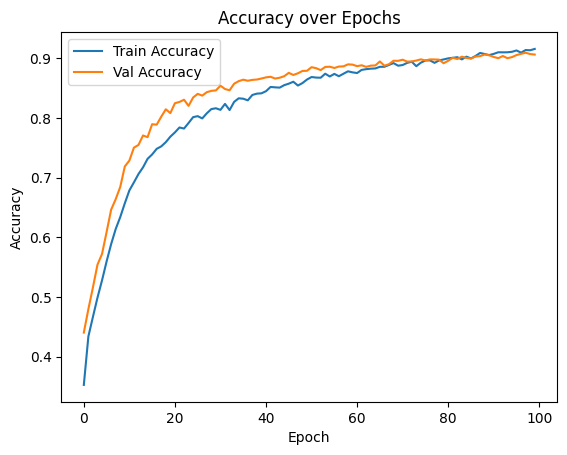

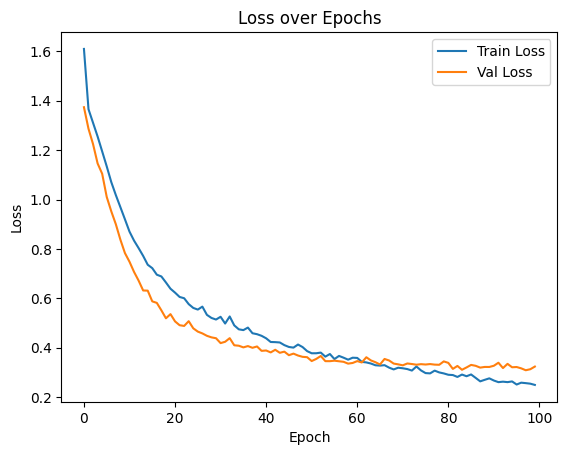

In [14]:
# Cell 14: Plot Training/Validation Accuracy & Loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()


In [15]:
# Cell 15: Confusion Matrix & Class-wise Metrics
from sklearn.metrics import classification_report, confusion_matrix

y_pred = np.argmax(model.predict(X_test_seq), axis=1)
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0     0.9599    0.9825    0.9711      2340
           1     0.9255    0.9239    0.9247      2339
           2     0.8873    0.8918    0.8896      2339
           3     0.9470    0.9765    0.9615      2340
           4     0.8025    0.7559    0.7785      2339

    accuracy                         0.9061     11697
   macro avg     0.9044    0.9061    0.9051     11697
weighted avg     0.9044    0.9061    0.9051     11697

Confusion Matrix:
 [[2299    3    4    2   32]
 [   5 2161   17    3  153]
 [  13   21 2086    9  210]
 [   4    5    6 2285   40]
 [  74  145  238  114 1768]]


366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


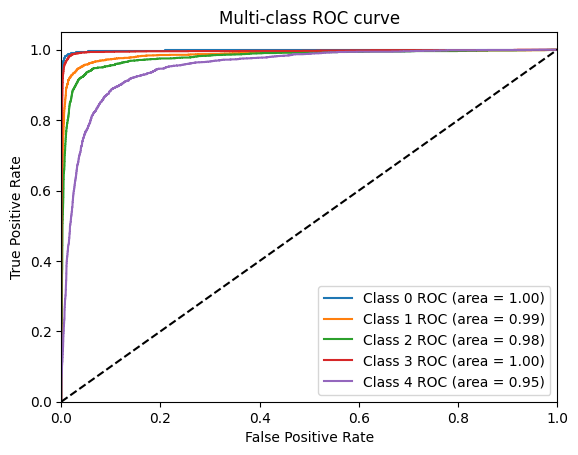

In [16]:
# Cell 16: ROC Curve (One-vs-Rest Multi-class)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

n_classes = 5
y_test_bin = label_binarize(y_test, classes=list(range(n_classes)))
y_score = model.predict(X_test_seq)

fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC curve')
plt.legend(loc='lower right')
plt.show()


In [17]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# y_test: true labels
# y_pred: predicted labels (e.g., np.argmax(model.predict(X_test), axis=1))

# Class-wise scores
report = classification_report(y_test, y_pred, digits=4, output_dict=True)
for label in sorted(report.keys()):
    if label.isdigit():
        print(f"Class {label}:")
        print(f"  Precision:  {report[label]['precision']:.4f}")
        print(f"  Recall:     {report[label]['recall']:.4f}")
        print(f"  F1-score:   {report[label]['f1-score']:.4f}")
        print(f"  Support:    {report[label]['support']}")
        print("")

# Overall (macro/micro/weighted) scores
print("Overall Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("Macro Precision:  {:.4f}".format(precision_score(y_test, y_pred, average='macro')))
print("Macro Recall:     {:.4f}".format(recall_score(y_test, y_pred, average='macro')))
print("Macro F1-score:   {:.4f}".format(f1_score(y_test, y_pred, average='macro')))
print("Weighted Precision:  {:.4f}".format(precision_score(y_test, y_pred, average='weighted')))
print("Weighted Recall:     {:.4f}".format(recall_score(y_test, y_pred, average='weighted')))
print("Weighted F1-score:   {:.4f}".format(f1_score(y_test, y_pred, average='weighted')))


Class 0:
  Precision:  0.9599
  Recall:     0.9825
  F1-score:   0.9711
  Support:    2340.0

Class 1:
  Precision:  0.9255
  Recall:     0.9239
  F1-score:   0.9247
  Support:    2339.0

Class 2:
  Precision:  0.8873
  Recall:     0.8918
  F1-score:   0.8896
  Support:    2339.0

Class 3:
  Precision:  0.9470
  Recall:     0.9765
  F1-score:   0.9615
  Support:    2340.0

Class 4:
  Precision:  0.8025
  Recall:     0.7559
  F1-score:   0.7785
  Support:    2339.0

Overall Accuracy: 0.9061
Macro Precision:  0.9044
Macro Recall:     0.9061
Macro F1-score:   0.9051
Weighted Precision:  0.9044
Weighted Recall:     0.9061
Weighted F1-score:   0.9051


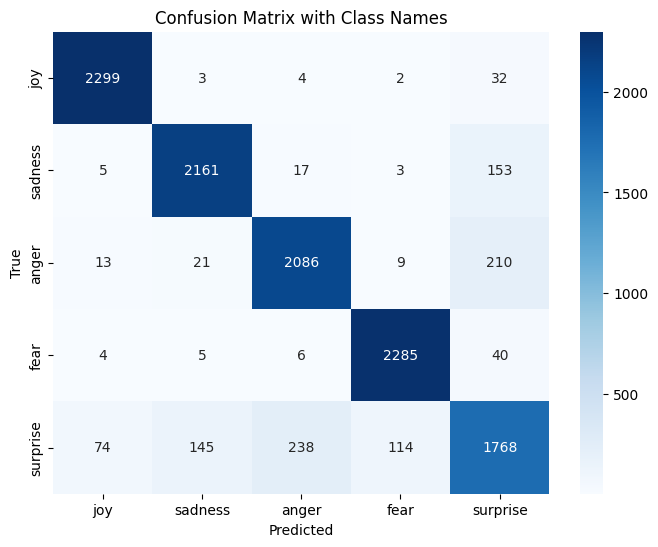

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


class_names = [
    "anger",       # 0
    "joy",         # 1
    "sad",          # 2
    "suprise",      # 3
    "neutral"       # 4
]

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix with Class Names')
plt.show()